# 1. Import required libraries and read the data

In [143]:
# 1. Import basic libraries
import math

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score, accuracy_score, f1_score, mean_squared_error

import tensorflow as tf
from tensorflow.keras import layers, optimizers

from helper_functions import plot_loss_curves

In [2]:
data = pd.read_csv('fifa_23_players_data.csv')

In [3]:
data.head()

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21


In [4]:
data.shape

(18539, 89)

# 2. Data Cleaning

In [5]:
#checking null values
for col_name, null_cnt in data.isnull().sum().to_dict().items():
    if null_cnt > 0:
        print(col_name, null_cnt)

**Nothing is printed, so we can say that none of the column has Null value. Let's see if we have duplicated values.**

In [6]:
#checking duplicate values
data.duplicated().sum()

119

**Seems like we have few duplicate values. Let's see what are those and get rid of it.**

In [7]:
data[data.duplicated()]


,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
1469,Aihen Muñoz,Aihen Muñoz Capellán,75,80,8000000,LB,LB,Spain,https://cdn.sofifa.net/players/246/748/23_60.png,24,...,74,73,74,75,74,75,75,73,75,21
1480,A. Hickey,Aaron Hickey,75,85,12000000,"RB,LB,LWB",RB,Scotland,https://cdn.sofifa.net/players/248/808/23_60.png,20,...,73,72,73,75,72,75,75,68,75,19
1481,J. Graterol,Joel Graterol,75,81,7000000,GK,GK,Venezuela,https://cdn.sofifa.net/players/250/842/23_60.png,25,...,25,29,25,22,25,22,22,24,22,76
1485,K. Adeyemi,Karim Adeyemi,75,87,13500000,ST,ST,Germany,https://cdn.sofifa.net/players/251/852/23_60.png,20,...,76,68,76,56,51,56,53,45,53,19
1497,S. Bornauw,Sebastiaan Bornauw,75,81,8000000,CB,CB,Belgium,https://cdn.sofifa.net/players/242/663/23_60.png,23,...,62,63,62,70,72,70,73,77,73,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1894,Jean,Jean Paulo Fernandes Filho,75,78,5500000,GK,GK,Brazil,https://cdn.sofifa.net/players/234/999/23_60.png,26,...,26,28,26,23,27,23,23,26,23,76
1895,L. Tawamba,Léandre Tawamba,75,75,4600000,ST,ST,Cameroon,https://cdn.sofifa.net/players/244/727/23_60.png,32,...,69,65,69,49,50,49,46,46,46,21
1896,S. Berge,Sander Berge,75,81,8000000,"CDM,CM",CB,Norway,https://cdn.sofifa.net/players/228/092/23_60.png,24,...,73,75,73,74,76,74,73,77,73,19
1897,A. Varela,Alan Varela,75,85,11500000,"CDM,CM",CDM,Argentina,https://cdn.sofifa.net/players/260/599/23_60.png,20,...,72,75,72,75,76,75,74,73,74,19


In [8]:
data[data.duplicated()].describe()

,Overall,Potential,Value(in Euro),Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Wage(in Euro),Release Clause,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
count,119.0,119.000000,1.190000e+02,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,1.190000e+02,...,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,75.0,79.277311,7.947059e+06,24.697479,181.554622,75.756303,1825.504202,403.714286,22978.151261,1.537143e+07,...,67.941176,67.294118,67.941176,65.949580,65.789916,65.949580,65.268908,63.747899,65.268908,22.941176
std,0.0,3.510093,2.918667e+06,3.376275,7.326175,7.989364,233.173932,22.916999,15095.868273,6.736507e+06,...,13.024940,11.674507,13.024940,13.107669,13.065593,13.107669,13.699992,14.715505,13.699992,14.288963
min,75.0,75.000000,0.000000e+00,18.000000,163.000000,56.000000,1004.000000,331.000000,0.000000,0.000000e+00,...,24.000000,26.000000,24.000000,22.000000,23.000000,22.000000,22.000000,23.000000,22.000000,16.000000
25%,75.0,75.500000,6.000000e+06,22.000000,175.500000,70.000000,1755.000000,390.500000,12500.000000,1.100000e+07,...,65.500000,65.000000,65.500000,63.000000,61.000000,63.000000,60.500000,56.000000,60.500000,18.000000
50%,75.0,79.000000,7.500000e+06,24.000000,182.000000,75.000000,1891.000000,406.000000,22000.000000,1.480000e+07,...,73.000000,70.000000,73.000000,71.000000,72.000000,71.000000,71.000000,71.000000,71.000000,19.000000
75%,75.0,82.000000,1.050000e+07,27.000000,187.500000,81.000000,1959.500000,419.000000,31000.000000,2.115000e+07,...,76.000000,75.000000,76.000000,74.000000,74.000000,74.000000,74.000000,75.000000,74.000000,20.000000
max,75.0,90.000000,1.350000e+07,38.000000,196.000000,97.000000,2103.000000,450.000000,81000.000000,2.890000e+07,...,78.000000,78.000000,78.000000,76.000000,78.000000,76.000000,76.000000,78.000000,76.000000,76.000000


**Hmm. Seems odd to see that only players with 75 OVR has duplicate values.**

Let's drop all duplicate values but keep last one for our dataset.

In [9]:
data.drop_duplicates(keep="last", inplace=True)

**Let's drop some columns that does not add values to regression.**

1. Full Name
2. Known As
2. Positions Played
3. Image Link
4. National Team Image Link



In [10]:
not_interested_columns = [
    'Known As',
    'Positions Played', 
    'Image Link',  
    'National Team Image Link'
]

data.drop(not_interested_columns, axis=1, inplace=True)

In [11]:
data

,Full Name,Overall,Potential,Value(in Euro),Best Position,Nationality,Age,Height(in cm),Weight(in kg),TotalStats,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,Lionel Messi,91,91,54000000,CAM,Argentina,35,169,67,2190,...,91,88,91,67,66,67,62,53,62,22
1,Karim Benzema,91,91,64000000,CF,France,34,185,81,2147,...,89,84,89,67,67,67,63,58,63,21
2,Robert Lewandowski,91,91,84000000,ST,Poland,33,185,81,2205,...,86,83,86,67,69,67,64,63,64,22
3,Kevin De Bruyne,91,91,107500000,CM,Belgium,31,181,70,2303,...,91,91,91,82,82,82,78,72,78,24
4,Kylian Mbappé,91,95,190500000,ST,France,23,182,73,2177,...,92,84,92,70,66,70,66,57,66,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,Darren Collins,47,56,110000,CAM,Republic of Ireland,21,174,68,1287,...,50,44,50,41,38,41,40,36,40,15
18535,Dejiang Yang,47,57,90000,CDM,China PR,17,175,60,1289,...,45,45,45,47,48,47,49,49,49,15
18536,Liam Mullan,47,67,130000,RM,Northern Ireland,18,170,65,1333,...,52,49,52,46,44,46,46,42,46,17
18537,Daithí McCallion,47,61,100000,CB,Republic of Ireland,17,178,65,1113,...,33,33,33,44,42,44,47,49,47,15


In [12]:
# Now let's see which column has Object data type and which has numarical
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18420 entries, 0 to 18538
Data columns (total 85 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Full Name                    18420 non-null  object
 1   Overall                      18420 non-null  int64 
 2   Potential                    18420 non-null  int64 
 3   Value(in Euro)               18420 non-null  int64 
 4   Best Position                18420 non-null  object
 5   Nationality                  18420 non-null  object
 6   Age                          18420 non-null  int64 
 7   Height(in cm)                18420 non-null  int64 
 8   Weight(in kg)                18420 non-null  int64 
 9   TotalStats                   18420 non-null  int64 
 10  BaseStats                    18420 non-null  int64 
 11  Club Name                    18420 non-null  object
 12  Wage(in Euro)                18420 non-null  int64 
 13  Release Clause               18

In [13]:
# Now let's get list of columns with Object datatype for one hot encoding.
obj_col_names = data.select_dtypes(include=['object']).columns.to_list()
obj_col_names

['Full Name',
 'Best Position',
 'Nationality',
 'Club Name',
 'Club Position',
 'Contract Until',
 'Club Jersey Number',
 'On Loan',
 'Preferred Foot',
 'National Team Name',
 'National Team Position',
 'National Team Jersey Number',
 'Attacking Work Rate',
 'Defensive Work Rate']

**Jersey Number should be numerical columns. Let's see what's the issue.**

In [14]:
data["National Team Jersey Number"].describe()

count     18420
unique       29
top           -
freq      17625
Name: National Team Jersey Number, dtype: object

**Issue is Jersey number has `-` as value. Let's replace it with 0 and convert whole column as Int64.**

In [15]:
data['National Team Jersey Number'].mask(data['National Team Jersey Number'] == '-', 0, inplace=True)

In [16]:
data["National Team Jersey Number"].describe()

count     18420
unique       29
top           0
freq      17625
Name: National Team Jersey Number, dtype: int64

In [17]:
# Convert column to Int64
data["National Team Jersey Number"] = data["National Team Jersey Number"].astype(int)

In [18]:
# Now let's get list of columns one more time with Object datatype for one hot encoding.
obj_col_names = data.select_dtypes(include=['object']).columns.to_list()
obj_col_names

['Full Name',
 'Best Position',
 'Nationality',
 'Club Name',
 'Club Position',
 'Contract Until',
 'Club Jersey Number',
 'On Loan',
 'Preferred Foot',
 'National Team Name',
 'National Team Position',
 'Attacking Work Rate',
 'Defensive Work Rate']

Now, let's see if there's any correlation between players skill rating and thier position.

# 3. EDA

Let's see what interesting facts are hiding in this data

In [19]:
corr_feature = ["Crossing", "Finishing", "Heading Accuracy", "Short Passing", "Volleys", "Dribbling", "Curve", "Freekick Accuracy", "LongPassing", "BallControl", "Acceleration", "Sprint Speed", "Agility", "Reactions", "Balance", "Shot Power", "Jumping", "Stamina", "Strength", "Long Shots", "Aggression", "Interceptions", "Positioning", "Vision", "Penalties", "Composure", "Marking", "Standing Tackle", "Sliding Tackle", "Goalkeeper Diving", "Goalkeeper Handling", " GoalkeeperKicking", "Goalkeeper Positioning", "ST Rating", "LW Rating", "LF Rating", "CF Rating", "RF Rating", "RW Rating", "CAM Rating", "LM Rating", "CM Rating", "RM Rating", "LWB Rating", "CDM Rating", "RWB Rating", "LB Rating", "CB Rating", "RB Rating", "GK Rating"]

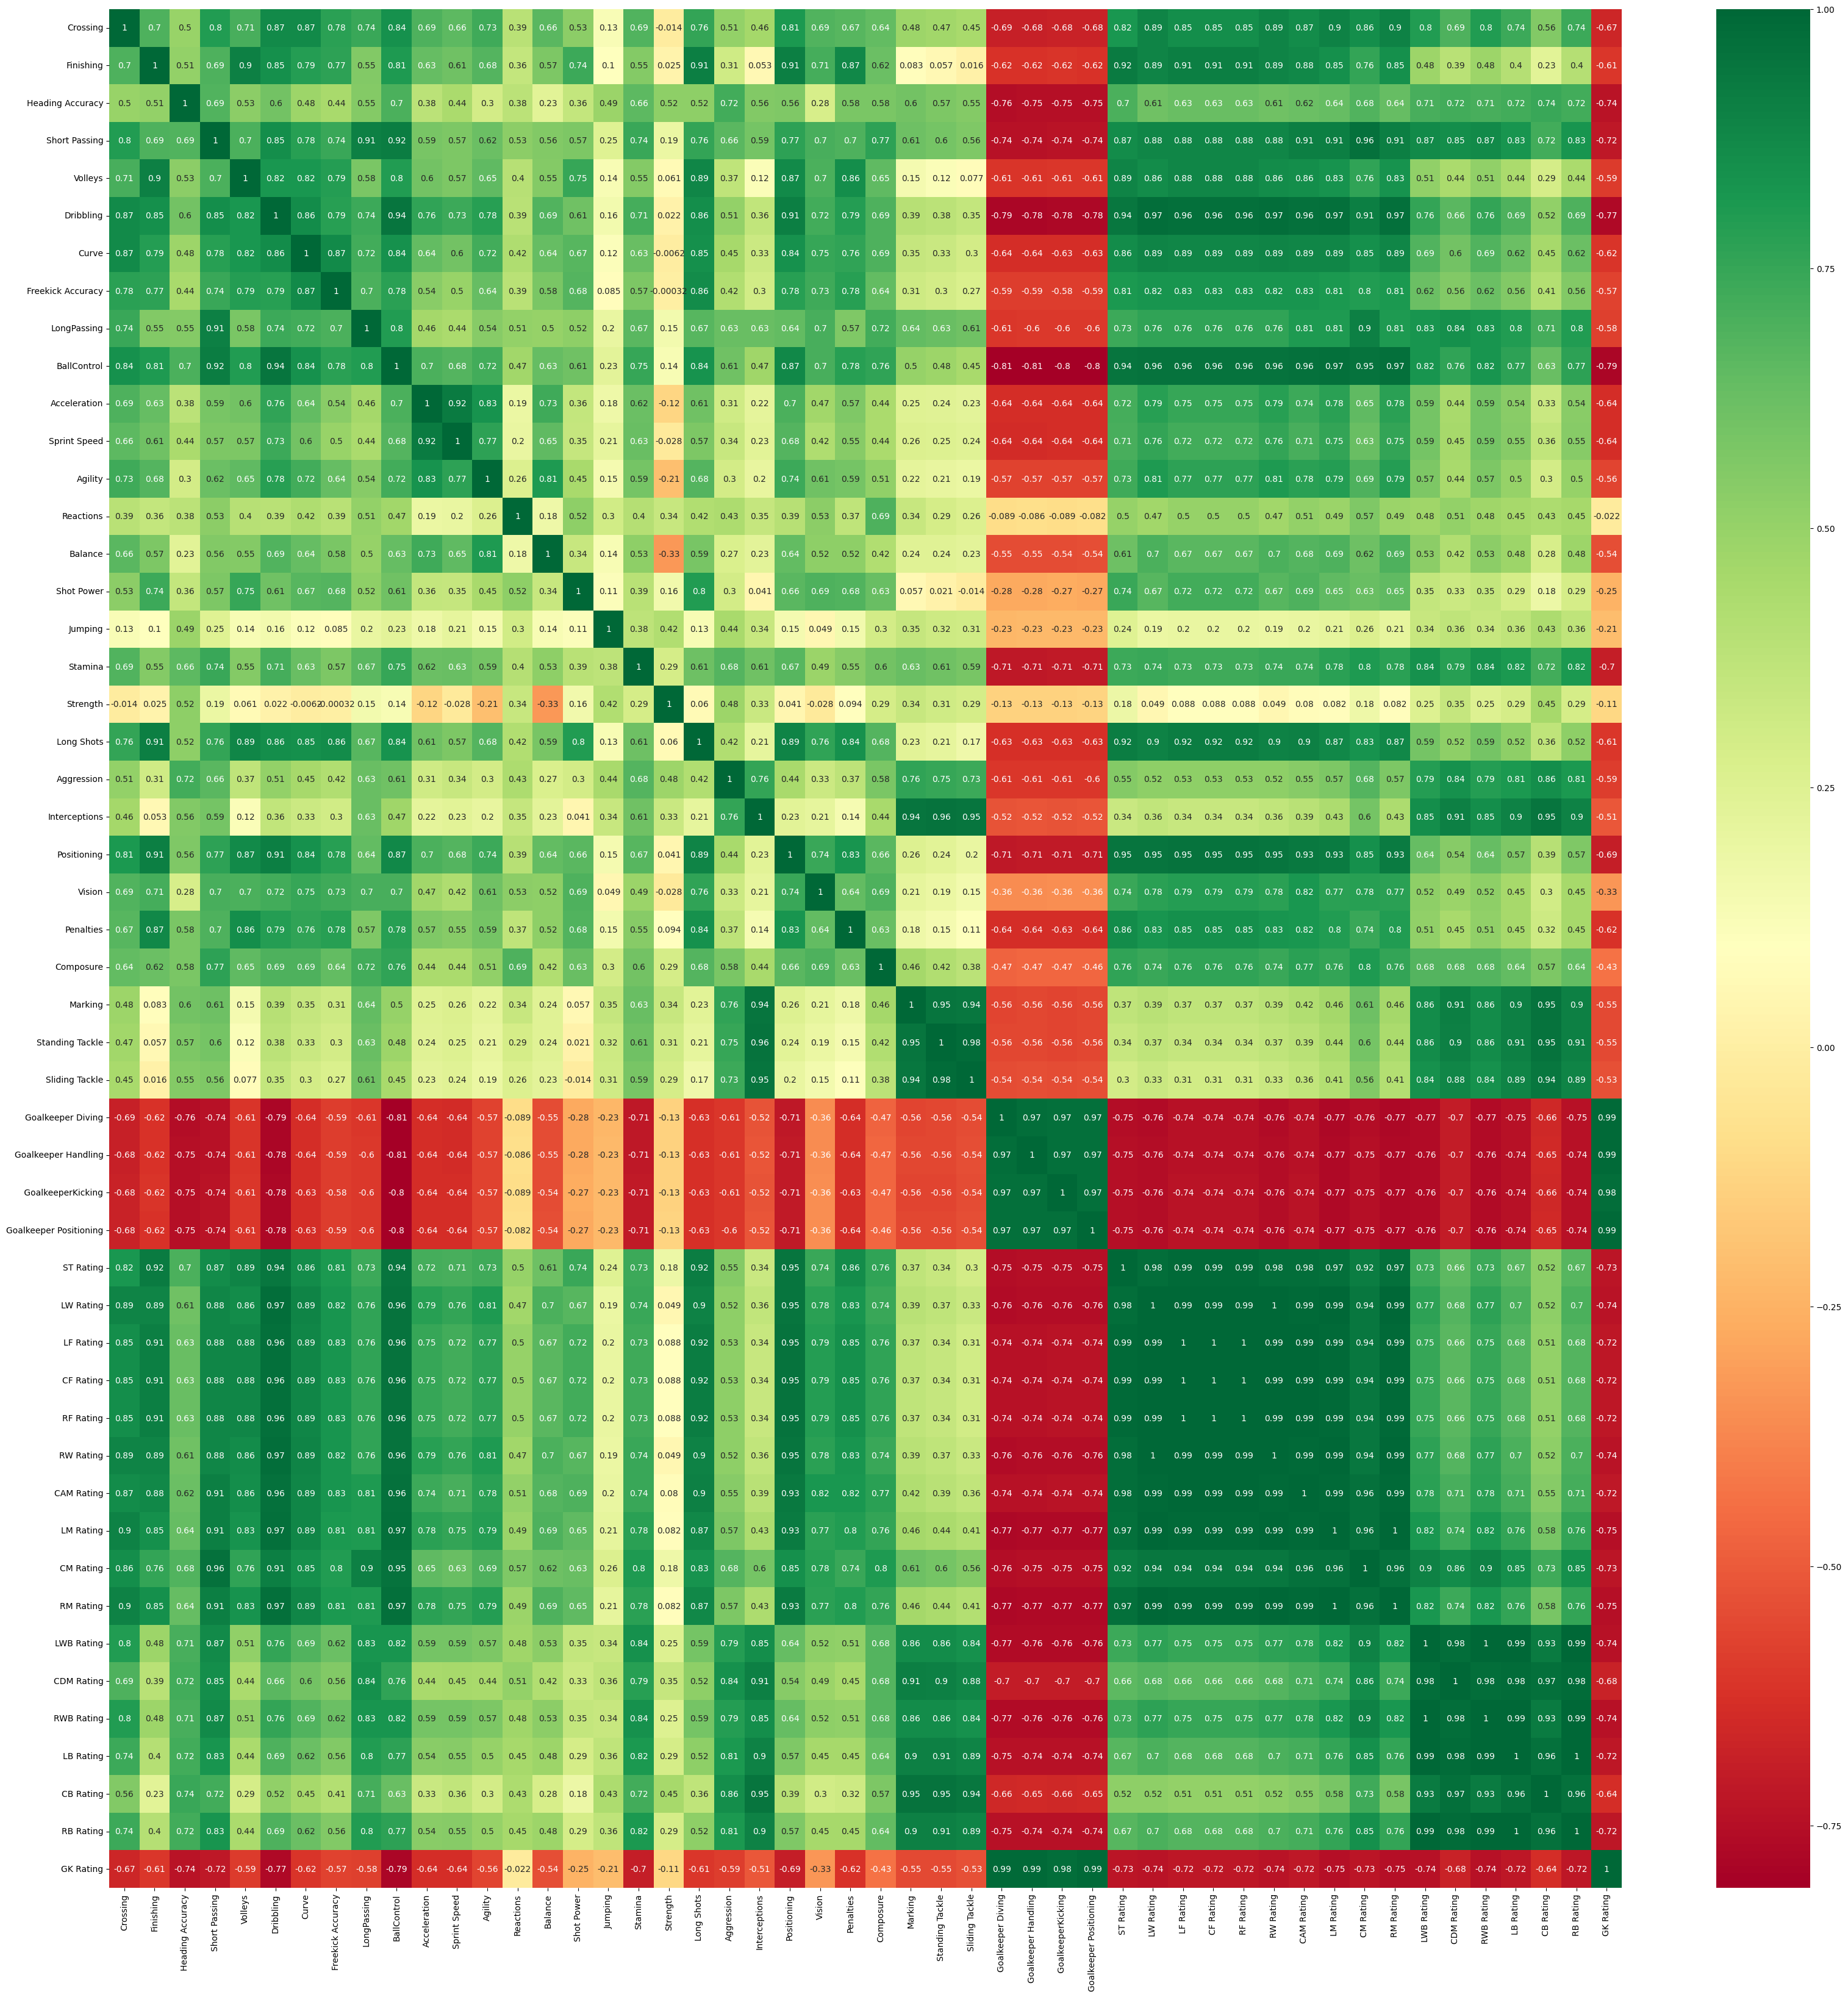

In [20]:
plt.figure(figsize=(40, 40))
sns.heatmap(data[corr_feature].corr(), annot=True, cmap="RdYlGn");

**As we can see from the heatmap that Attack, Mid Field and Defence positions are highly correlated with eachother as expected. Goal Keeping positions are only related with Goal Keeping attributes.**

**Defence positions are more correlated with attributes like Tackle and Marking, while dribbling and Crossings are more correlated with postions of attck like ST, CF etc.**

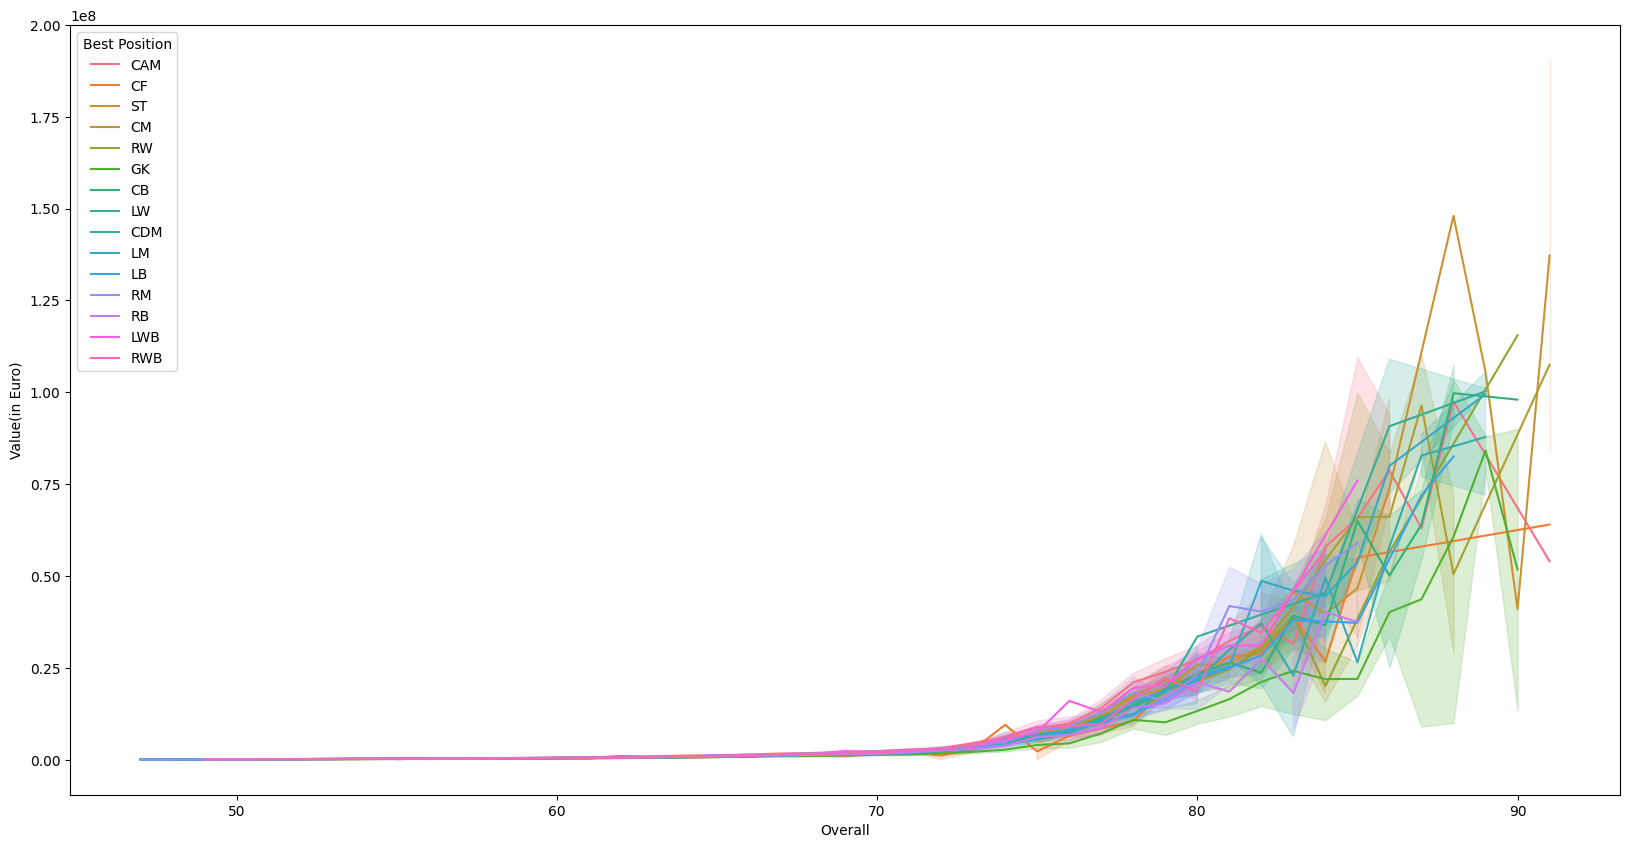

In [21]:
# Now let's compare player's overall with their price.
plt.figure(figsize=(20, 10))
sns.lineplot(data=data, x="Overall", y="Value(in Euro)", hue="Best Position");

As per graph, attacker gets paid more then defender. 

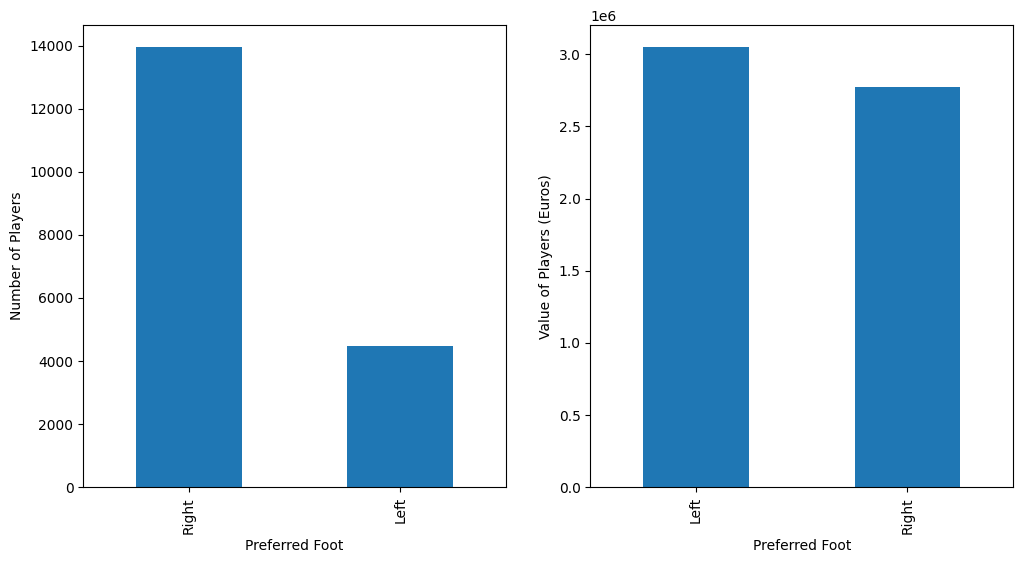

In [22]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
data["Preferred Foot"].value_counts().plot.bar()
plt.xlabel("Preferred Foot")
plt.ylabel("Number of Players")

plt.subplot(1, 2, 2)
data.groupby('Preferred Foot', as_index=True)['Value(in Euro)'].mean().plot.bar()
plt.ylabel("Value of Players (Euros)");

Based on this, if you play with your **left foot**, you are more likely to **get paid more**.

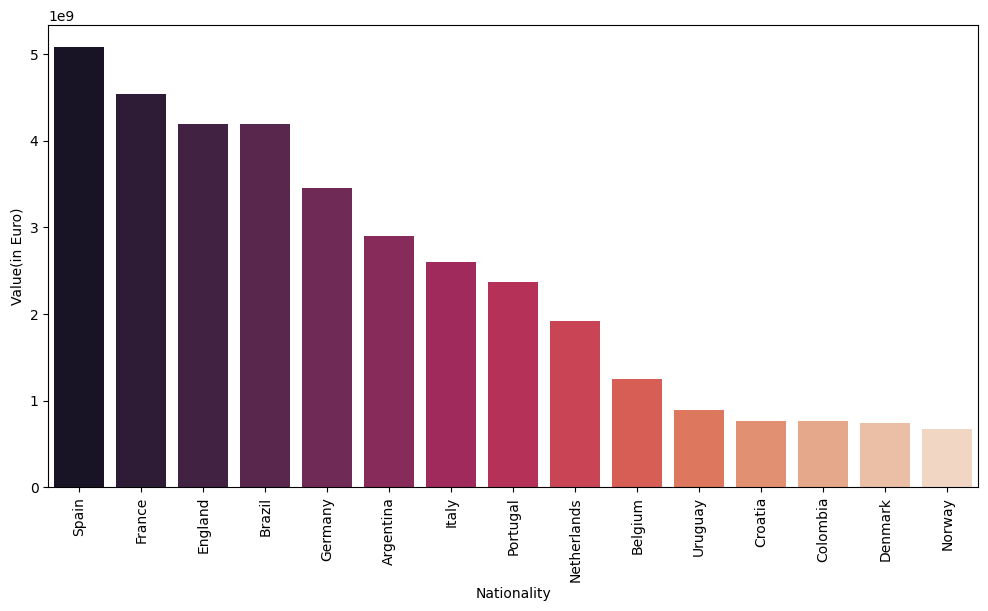

In [23]:
plt.figure(figsize=(12, 6))
sns.barplot(data=data.groupby('Nationality', as_index=False)['Value(in Euro)'].sum().sort_values(by="Value(in Euro)", ascending=False).head(15),
            x="Nationality", y="Value(in Euro)", palette="rocket");
plt.xticks(rotation=90);

Looks like European players earns significanly more than players with other nationality. 

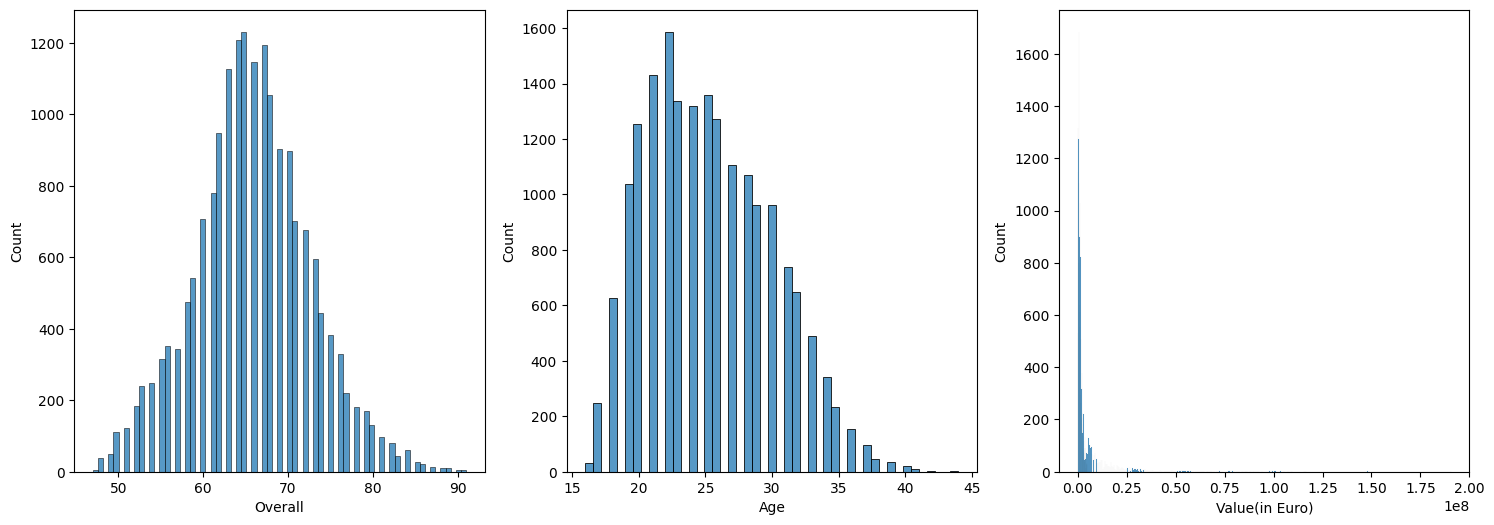

In [24]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.histplot(data=data["Overall"])

plt.subplot(1, 3, 2)
sns.histplot(data=data["Age"])

plt.subplot(1, 3, 3)
sns.histplot(data=data["Value(in Euro)"]);

Much more players are in their 20s and have Overall of between 60 to 70 while earning in 6 figures. Just a fraction of amount of all players can cross 7 figure digit earning.

# 4. Modeling

In [25]:
# define categorical transformer
categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
    ]
)

# Apply categorical transformer on categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, obj_col_names[1:]),  # Not considering Name as feature
    ]
)

# define classifier
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LinearRegression())]
)

**Let's prepare data in X and y**

In [26]:
X = data[data.columns[~data.columns.isin(['Full Name','Value(in Euro)'])]]
X

,Overall,Potential,Best Position,Nationality,Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Club Name,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,91,91,CAM,Argentina,35,169,67,2190,452,Paris Saint-Germain,...,91,88,91,67,66,67,62,53,62,22
1,91,91,CF,France,34,185,81,2147,455,Real Madrid CF,...,89,84,89,67,67,67,63,58,63,21
2,91,91,ST,Poland,33,185,81,2205,458,FC Barcelona,...,86,83,86,67,69,67,64,63,64,22
3,91,91,CM,Belgium,31,181,70,2303,483,Manchester City,...,91,91,91,82,82,82,78,72,78,24
4,91,95,ST,France,23,182,73,2177,470,Paris Saint-Germain,...,92,84,92,70,66,70,66,57,66,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,47,56,CAM,Republic of Ireland,21,174,68,1287,274,Sligo Rovers,...,50,44,50,41,38,41,40,36,40,15
18535,47,57,CDM,China PR,17,175,60,1289,267,Guangzhou FC,...,45,45,45,47,48,47,49,49,49,15
18536,47,67,RM,Northern Ireland,18,170,65,1333,277,Derry City,...,52,49,52,46,44,46,46,42,46,17
18537,47,61,CB,Republic of Ireland,17,178,65,1113,226,Derry City,...,33,33,33,44,42,44,47,49,47,15


In [27]:
y = data["Value(in Euro)"]
y

0         54000000
1         64000000
2         84000000
3        107500000
4        190500000
           ...    
18534       110000
18535        90000
18536       130000
18537       100000
18538        60000
Name: Value(in Euro), Length: 18420, dtype: int64

In [28]:
X_fit = preprocessor.fit_transform(X).toarray()

In [29]:
X_fit.shape

(18420, 1048)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_fit, y, test_size=0.3, random_state=42)

In [31]:
lr = LinearRegression(positive=True)

In [32]:
linear_regression_baseline = lr.fit(X_train, y_train)

In [33]:
# Predicting x_test values
y_pred = linear_regression_baseline.predict(X_test)
y_pred

array([ 2887680.,   479232.,  -256000., ..., 10878976.,   299008.,
        1294336.])

In [34]:
np.array(y_test)

array([2100000, 1000000,  275000, ..., 5500000, 1800000,  950000])

Accuracy of model

In [35]:
r2_score_value = r2_score(y_true=y_test, y_pred=y_pred)
r2_score_value

0.5264296827557402

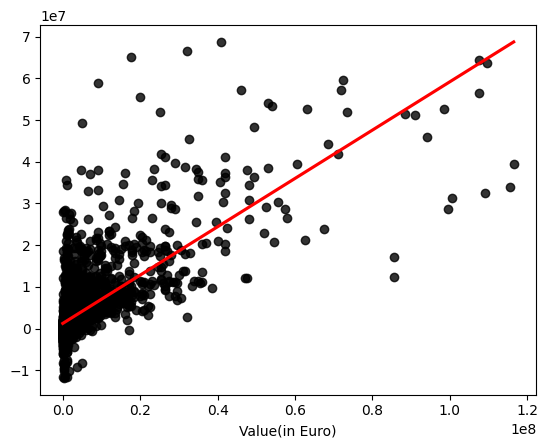

In [36]:
import seaborn as sns
sns.regplot(x=y_test, y=y_pred, ci=None, scatter_kws={"color": "black"}, line_kws={"color": "red"});

In [144]:
mse_baseline = mean_squared_error(y_test, y_pred)  
rmse_baseline = math.sqrt(mse_baseline)  
  
print("Root Mean Squared Error: ", rmse_baseline) 
print("Mean Squared Error: ", mse_baseline)

Root Mean Squared Error:  5377318.596256742
Mean Squared Error:  28915555285648.586


### Model 1: With 1 Dense layers

In [145]:
X_train_tf = tf.convert_to_tensor(X_train.astype(np.float64))
X_test_tf = tf.convert_to_tensor(X_test.astype(np.float64))
y_train_tf = tf.convert_to_tensor(y_train.astype(np.float64))
y_test_tf = tf.convert_to_tensor(y_test.astype(np.float64))

In [41]:
X_test.shape, X_train.shape

((5526, 1048), (12894, 1048))

In [42]:
X_test_tf.shape, X_train_tf.shape

(TensorShape([5526, 1048]), TensorShape([12894, 1048]))

In [43]:
def rmse(y_test, y_pred):
  return tf.sqrt(tf.reduce_mean(tf.square(tf.subtract(float(y_test), float(y_pred)))))

In [44]:
from tensorflow.keras.losses import mean_squared_error

In [45]:
model_1 = tf.keras.Sequential([
    layers.Input(shape=(1048,)),
    layers.Dense(256, activation="relu"),
    layers.Dense(1)
])

model_1.compile(loss=rmse, optimizer=optimizers.Adam(), metrics=[rmse])

In [46]:
history_1 = model_1.fit(X_train_tf, y_train_tf, epochs=200, validation_data=(X_test, y_test))

Epoch 1/200
 58/403 [===>..........................] - ETA: 0s - loss: 6819989.0000 - rmse: 6819989.0000

2023-02-12 14:41:39.707970: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


403/403 [==============================] - 3s 3ms/step - loss: 6691510.5000 - rmse: 6691037.0000 - val_loss: 6727227.0000 - val_rmse: 6738654.5000
Epoch 2/200
403/403 [==============================] - 1s 3ms/step - loss: 6672608.5000 - rmse: 6674346.0000 - val_loss: 6726345.0000 - val_rmse: 6737773.5000
Epoch 3/200
403/403 [==============================] - 1s 3ms/step - loss: 6664926.5000 - rmse: 6664937.0000 - val_loss: 6724950.0000 - val_rmse: 6736379.0000
Epoch 4/200
403/403 [==============================] - 1s 3ms/step - loss: 6704345.0000 - rmse: 6706234.0000 - val_loss: 6723126.0000 - val_rmse: 6734555.5000
Epoch 5/200
403/403 [==============================] - 1s 3ms/step - loss: 6686265.5000 - rmse: 6685970.5000 - val_loss: 6720872.0000 - val_rmse: 6732302.0000
Epoch 6/200
403/403 [==============================] - 1s 3ms/step - loss: 6674050.5000 - rmse: 6674157.5000 - val_loss: 6718203.5000 - val_rmse: 6729635.0000
Epoch 7/200
403/403 [==============================] - 1s 

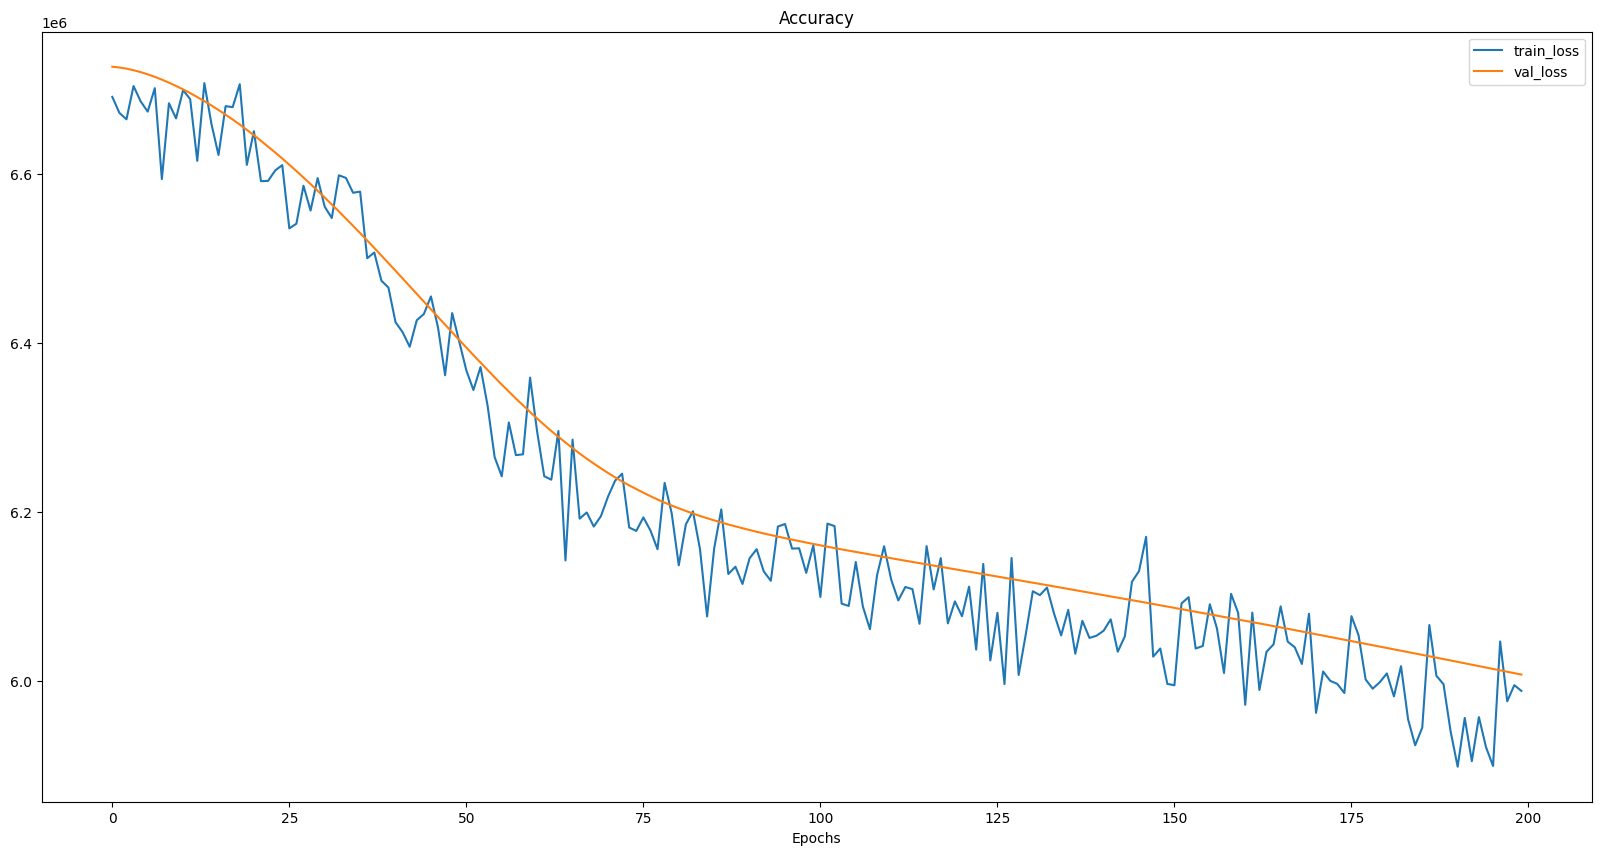

In [58]:
plot_loss_curves(history_1)

In [59]:
result_1 = model_1.evaluate(X_test, y_test)
result_1

173/173 [==============================] - 0s 2ms/step - loss: 6007323.0000 - rmse: 6018596.5000


[6007323.0, 6018596.5]

### Model 2: with 2 layers

In [60]:
model_2 = tf.keras.Sequential([
    layers.Input(shape=(1048,)),
    layers.Dense(256, activation="relu"),
    layers.Dense(256, activation="relu"),
    layers.Dense(1)
])

model_2.compile(loss=rmse, optimizer=optimizers.Adam(), metrics=[rmse])

In [61]:
history_2 = model_2.fit(X_train_tf, y_train_tf, epochs=200, validation_data=(X_test, y_test))

Epoch 1/200
403/403 [==============================] - 2s 4ms/step - loss: 6775196.5000 - rmse: 6775146.5000 - val_loss: 6656905.0000 - val_rmse: 6668357.0000
Epoch 2/200
403/403 [==============================] - 1s 3ms/step - loss: 6507107.5000 - rmse: 6506858.5000 - val_loss: 6315994.0000 - val_rmse: 6327478.0000
Epoch 3/200
403/403 [==============================] - 1s 4ms/step - loss: 6189518.0000 - rmse: 6189265.0000 - val_loss: 6171050.5000 - val_rmse: 6182355.0000
Epoch 4/200
403/403 [==============================] - 1s 3ms/step - loss: 6119402.5000 - rmse: 6118942.5000 - val_loss: 6131888.5000 - val_rmse: 6143117.5000
Epoch 5/200
403/403 [==============================] - 1s 4ms/step - loss: 6083943.0000 - rmse: 6083309.0000 - val_loss: 6099095.5000 - val_rmse: 6110297.5000
Epoch 6/200
403/403 [==============================] - 1s 3ms/step - loss: 6130111.5000 - rmse: 6130606.5000 - val_loss: 6065141.5000 - val_rmse: 6076322.0000
Epoch 7/200
403/403 [=========================

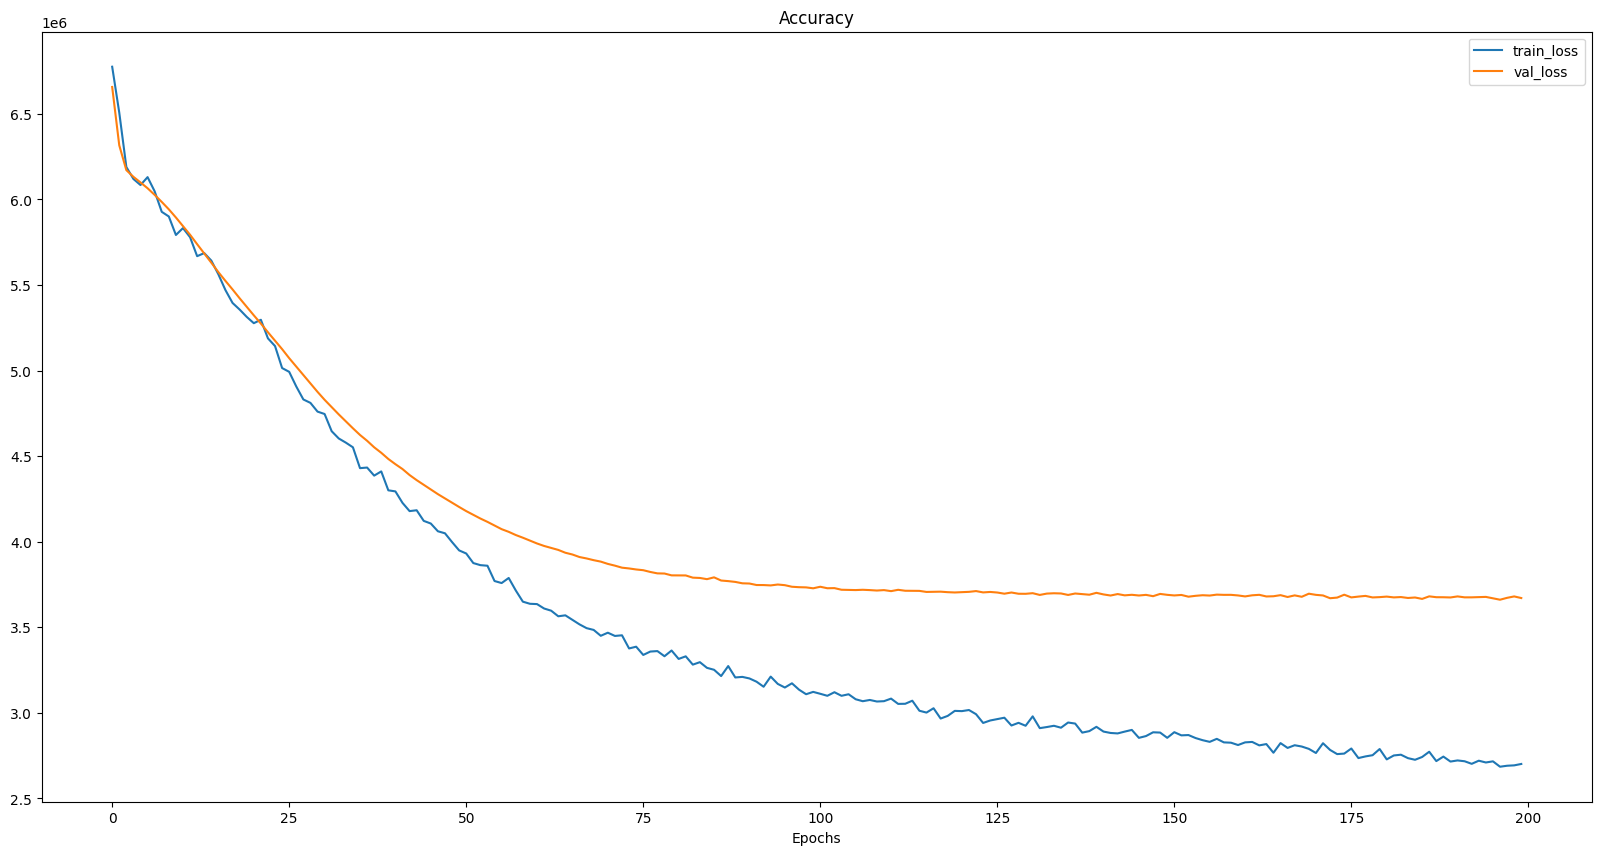

In [62]:
plot_loss_curves(history_2)

In [63]:
result_2 = model_2.evaluate(X_test, y_test)
result_2

173/173 [==============================] - 0s 2ms/step - loss: 3670906.2500 - rmse: 3675308.7500


[3670906.25, 3675308.75]

### Model 3: with 4 layers

In [64]:
model_3 = tf.keras.Sequential([
    layers.Input(shape=(1048,)),
    layers.Dense(512, activation="selu"),
    layers.Dense(256, activation="selu"),
    layers.Dense(128, activation="selu"),
    layers.Dense(1)
])

model_3.compile(loss=rmse, optimizer=optimizers.Adam(), metrics=[rmse])

In [65]:
history_3 = model_3.fit(X_train_tf, y_train_tf, epochs=200, validation_data=(X_test, y_test))

Epoch 1/200
403/403 [==============================] - 2s 5ms/step - loss: 6296163.0000 - rmse: 6295555.0000 - val_loss: 6147867.5000 - val_rmse: 6159083.5000
Epoch 2/200
403/403 [==============================] - 2s 4ms/step - loss: 5980189.0000 - rmse: 5981002.5000 - val_loss: 5717789.5000 - val_rmse: 5729080.0000
Epoch 3/200
403/403 [==============================] - 1s 3ms/step - loss: 5430289.5000 - rmse: 5429889.0000 - val_loss: 5120849.0000 - val_rmse: 5131799.0000
Epoch 4/200
403/403 [==============================] - 1s 4ms/step - loss: 4808858.0000 - rmse: 4808482.5000 - val_loss: 4709214.5000 - val_rmse: 4719502.5000
Epoch 5/200
403/403 [==============================] - 1s 4ms/step - loss: 4272582.5000 - rmse: 4272087.0000 - val_loss: 4329849.0000 - val_rmse: 4340141.0000
Epoch 6/200
403/403 [==============================] - 1s 3ms/step - loss: 3925427.0000 - rmse: 3925069.5000 - val_loss: 4085260.5000 - val_rmse: 4094705.2500
Epoch 7/200
403/403 [=========================

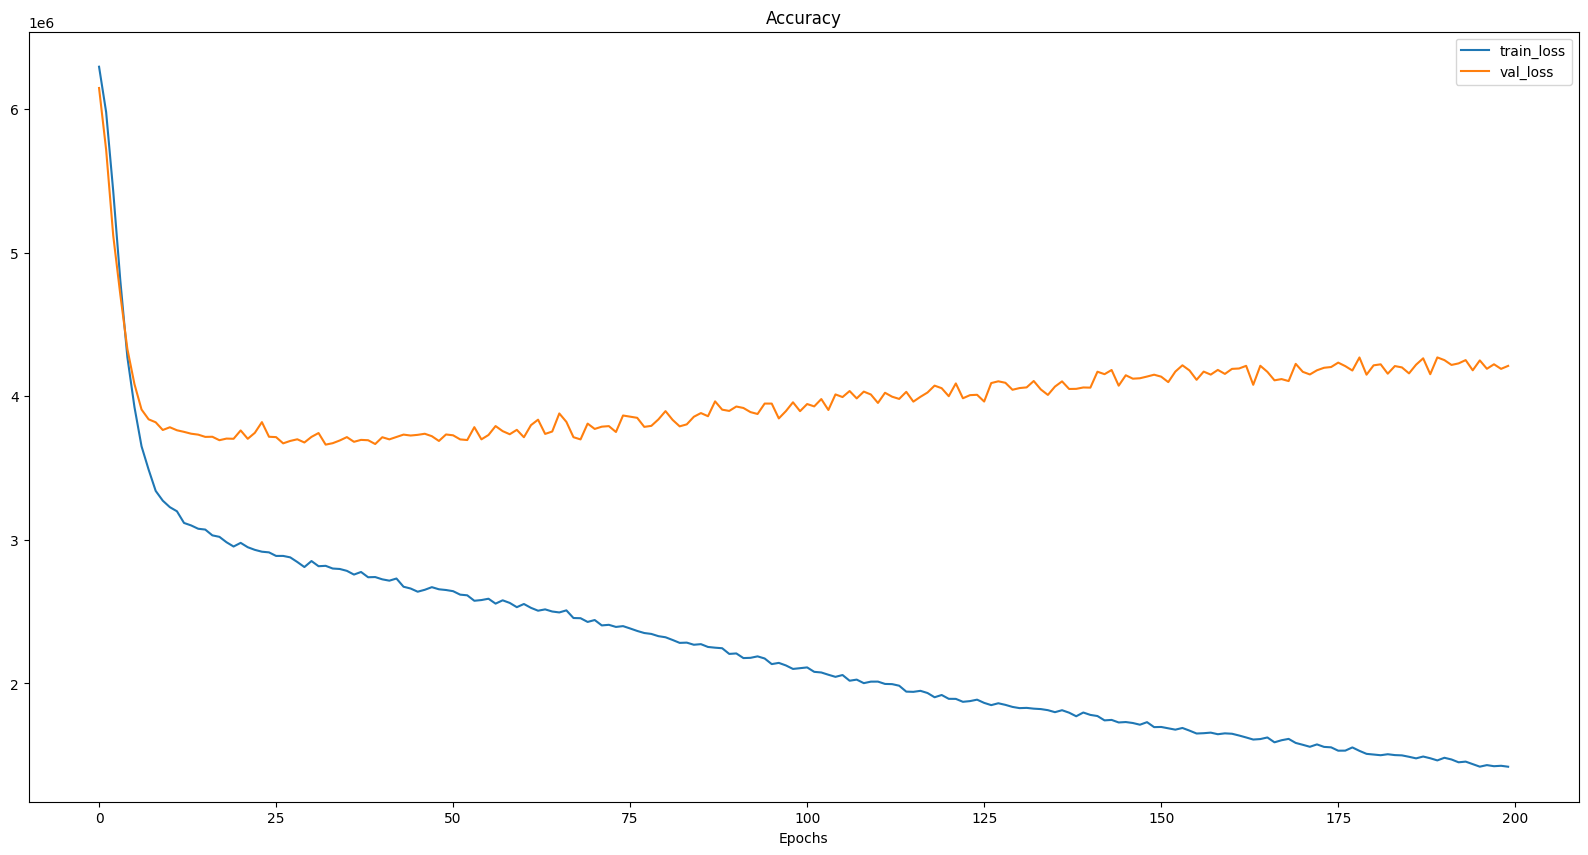

In [66]:
plot_loss_curves(history_3)

In [67]:
result_3 = model_3.evaluate(X_test, y_test)
result_3

173/173 [==============================] - 0s 2ms/step - loss: 4212203.0000 - rmse: 4214778.0000


[4212203.0, 4214778.0]

Since Model-2 gives the best accuracy(between train and target dataset) compared to others, we will try to test with different optimizers like:
- Adagrad
- Adadelta
- GD
- Momentum
- RMSProp

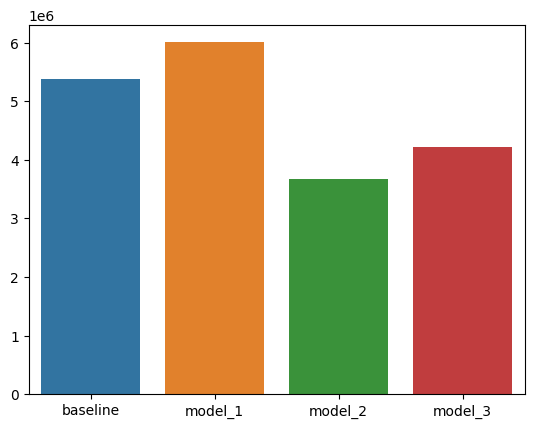

In [117]:
original_model_scores_dict = {
    "baseline": rmse_baseline,
    "model_1": result_1[0],
    "model_2": result_2[0],
    "model_3": result_3[0]
}

sns.barplot(data=pd.DataFrame(original_model_scores_dict, index=original_model_scores_dict.keys()));

**Looks like model_2 is performing well compared to others.** So, we will try model_2's variation with different Optimizers to see which one gives best results.

### Model 2.1: with Adagrad

Adagrad is an optimizer with parameter-specific learning rates, which are adapted relative to how frequently a parameter gets updated during training. The more updates a parameter receives, the smaller the updates.

In [85]:
model_2_1 = tf.keras.Sequential([
    layers.Input(shape=(1048,)),
    layers.Dense(256, activation="relu"),
    layers.Dense(256, activation="relu"),
    layers.Dense(1)
])

# Original AdaGrad paper recommends learning rate to be 1.0, so we will start with 1.0
model_2_1.compile(loss=rmse, optimizer=optimizers.Adagrad(learning_rate=1.0), metrics=[rmse])

In [86]:
history_2_1 = model_2_1.fit(X_train_tf, y_train_tf, epochs=200, validation_data=(X_test, y_test))

Epoch 1/200
403/403 [==============================] - 2s 3ms/step - loss: 4905026.0000 - rmse: 4905051.0000 - val_loss: 4176003.5000 - val_rmse: 4188167.7500
Epoch 2/200
403/403 [==============================] - 1s 3ms/step - loss: 3715159.0000 - rmse: 3714716.5000 - val_loss: 3838000.2500 - val_rmse: 3847540.2500
Epoch 3/200
403/403 [==============================] - 1s 3ms/step - loss: 3371872.0000 - rmse: 3372055.7500 - val_loss: 3736730.2500 - val_rmse: 3744360.7500
Epoch 4/200
403/403 [==============================] - 1s 3ms/step - loss: 3111219.2500 - rmse: 3111091.5000 - val_loss: 3714104.2500 - val_rmse: 3720962.5000
Epoch 5/200
403/403 [==============================] - 1s 3ms/step - loss: 2992426.2500 - rmse: 2992260.5000 - val_loss: 3673358.5000 - val_rmse: 3679822.0000
Epoch 6/200
403/403 [==============================] - 1s 4ms/step - loss: 2844410.0000 - rmse: 2844047.2500 - val_loss: 3664950.7500 - val_rmse: 3670956.7500
Epoch 7/200
403/403 [=========================

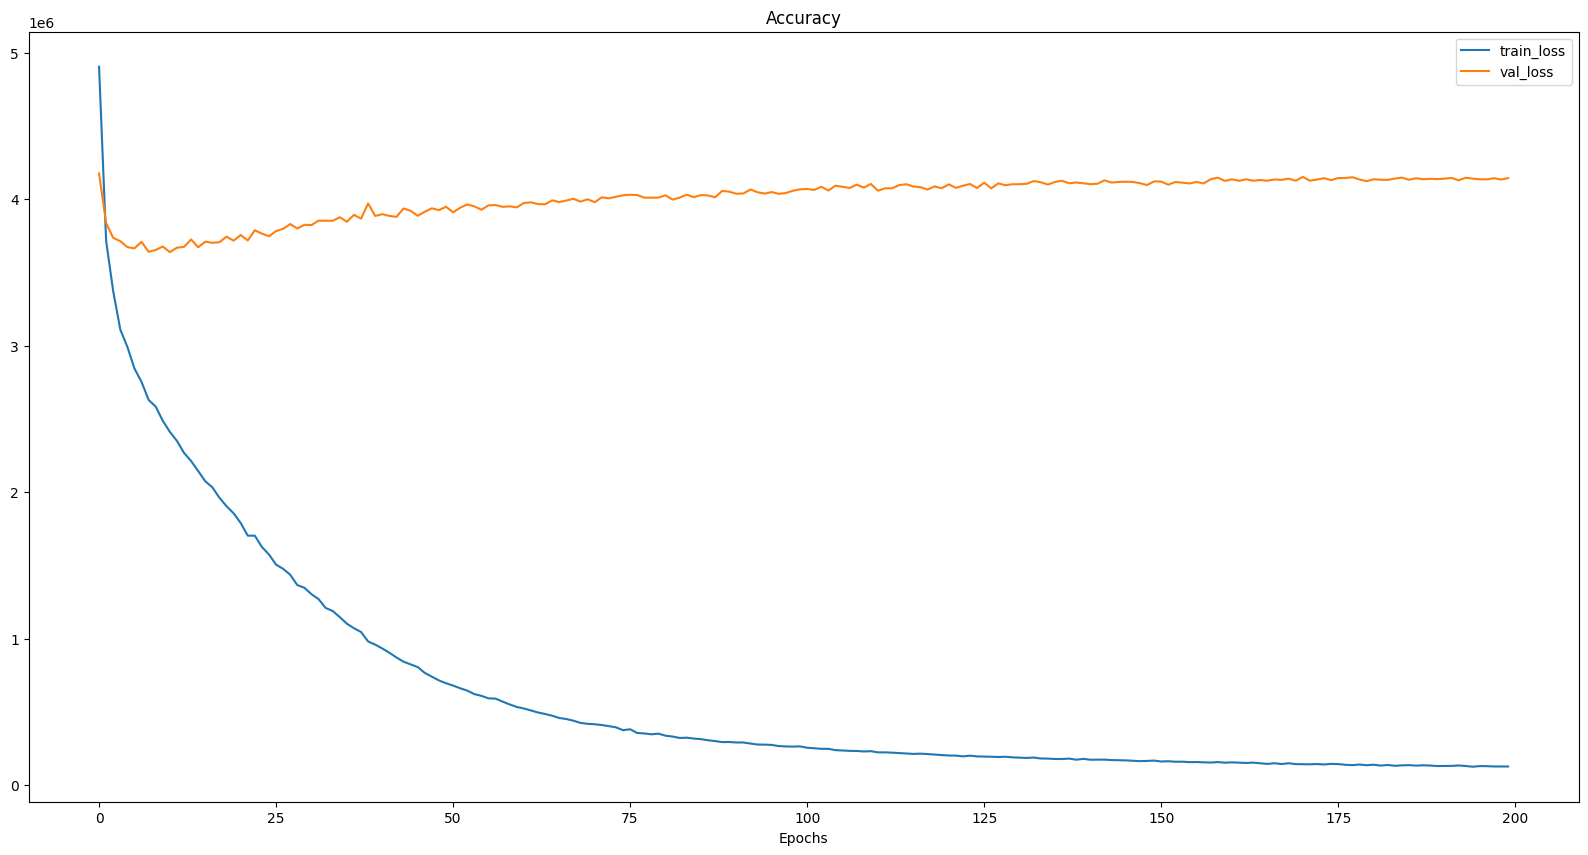

In [87]:
plot_loss_curves(history_2_1)

In [88]:
result_2_1 = model_2_1.evaluate(X_test, y_test)
result_2_1

173/173 [==============================] - 0s 2ms/step - loss: 4144053.5000 - rmse: 4147339.7500


[4144053.5, 4147339.75]

### Model 2.2: with Adadelta

Adadelta is a more robust extension of Adagrad that adapts learning rates based on a moving window of gradient updates, instead of accumulating all past gradients. This way, Adadelta continues learning even when many updates have been done. Compared to Adagrad, in the original version of Adadelta you don't have to set an initial learning rate. In this version, the initial learning rate can be set, as in most other Keras optimizers.

In [89]:
model_2_2 = tf.keras.Sequential([
    layers.Input(shape=(1048,)),
    layers.Dense(256, activation="relu"),
    layers.Dense(256, activation="relu"),
    layers.Dense(1)
])

model_2_2.compile(loss=rmse, optimizer=optimizers.Adadelta(learning_rate=1.0), metrics=[rmse])

In [90]:
history_2_2 = model_2_2.fit(X_train_tf, y_train_tf, epochs=200, validation_data=(X_test, y_test))

Epoch 1/200
403/403 [==============================] - 2s 5ms/step - loss: 5861590.5000 - rmse: 5861063.5000 - val_loss: 5580836.0000 - val_rmse: 5592308.0000
Epoch 2/200
403/403 [==============================] - 2s 4ms/step - loss: 5543345.0000 - rmse: 5542847.0000 - val_loss: 5521235.0000 - val_rmse: 5532872.5000
Epoch 3/200
403/403 [==============================] - 2s 4ms/step - loss: 5508077.0000 - rmse: 5508063.5000 - val_loss: 5522454.0000 - val_rmse: 5533939.5000
Epoch 4/200
403/403 [==============================] - 1s 4ms/step - loss: 5383561.5000 - rmse: 5383661.5000 - val_loss: 5468264.0000 - val_rmse: 5479801.5000
Epoch 5/200
403/403 [==============================] - 1s 4ms/step - loss: 5399876.0000 - rmse: 5400343.0000 - val_loss: 5443506.0000 - val_rmse: 5455205.5000
Epoch 6/200
403/403 [==============================] - 1s 4ms/step - loss: 5359257.5000 - rmse: 5358870.0000 - val_loss: 5426622.0000 - val_rmse: 5438367.5000
Epoch 7/200
403/403 [=========================

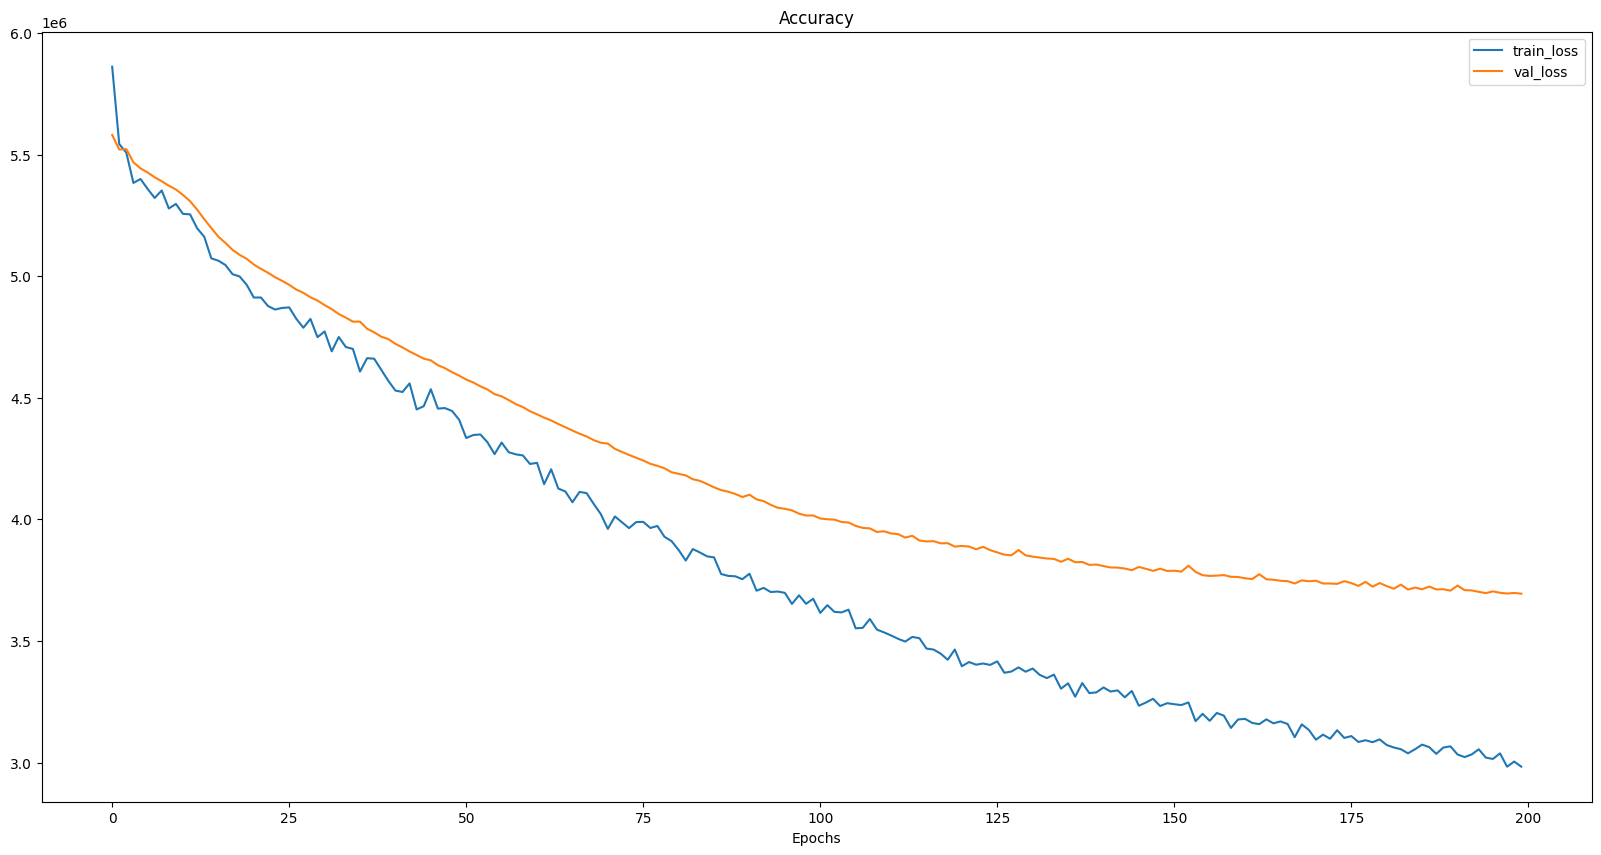

In [91]:
plot_loss_curves(history_2_2)

In [92]:
result_2_2 = model_2_2.evaluate(X_test, y_test)
result_2_2

173/173 [==============================] - 0s 2ms/step - loss: 3694370.0000 - rmse: 3702103.0000


[3694370.0, 3702103.0]

### Model 2.3: with SGD (nesterov)

In [93]:
model_2_3 = tf.keras.Sequential([
    layers.Input(shape=(1048,)),
    layers.Dense(256, activation="relu"),
    layers.Dense(256, activation="relu"),
    layers.Dense(1)
])

# Enabling Nesterov momentum for SGD
model_2_3.compile(loss=rmse, optimizer=optimizers.SGD(nesterov=True), metrics=[rmse])

In [94]:
history_2_3 = model_2_3.fit(X_train_tf, y_train_tf, epochs=200, validation_data=(X_test, y_test))

Epoch 1/200
403/403 [==============================] - 2s 4ms/step - loss: 6725735.5000 - rmse: 6725397.5000 - val_loss: 6727517.5000 - val_rmse: 6738945.5000
Epoch 2/200
403/403 [==============================] - 1s 3ms/step - loss: 6697996.0000 - rmse: 6698222.0000 - val_loss: 6727515.5000 - val_rmse: 6738943.5000
Epoch 3/200
403/403 [==============================] - 1s 3ms/step - loss: 6702823.5000 - rmse: 6704260.0000 - val_loss: 6727514.5000 - val_rmse: 6738942.5000
Epoch 4/200
403/403 [==============================] - 1s 4ms/step - loss: 6756398.5000 - rmse: 6756094.5000 - val_loss: 6727517.0000 - val_rmse: 6738944.5000
Epoch 5/200
403/403 [==============================] - 1s 4ms/step - loss: 6680657.5000 - rmse: 6681311.0000 - val_loss: 6727513.0000 - val_rmse: 6738941.0000
Epoch 6/200
403/403 [==============================] - 1s 4ms/step - loss: 6697779.0000 - rmse: 6697778.0000 - val_loss: 6727511.5000 - val_rmse: 6738939.5000
Epoch 7/200
403/403 [=========================

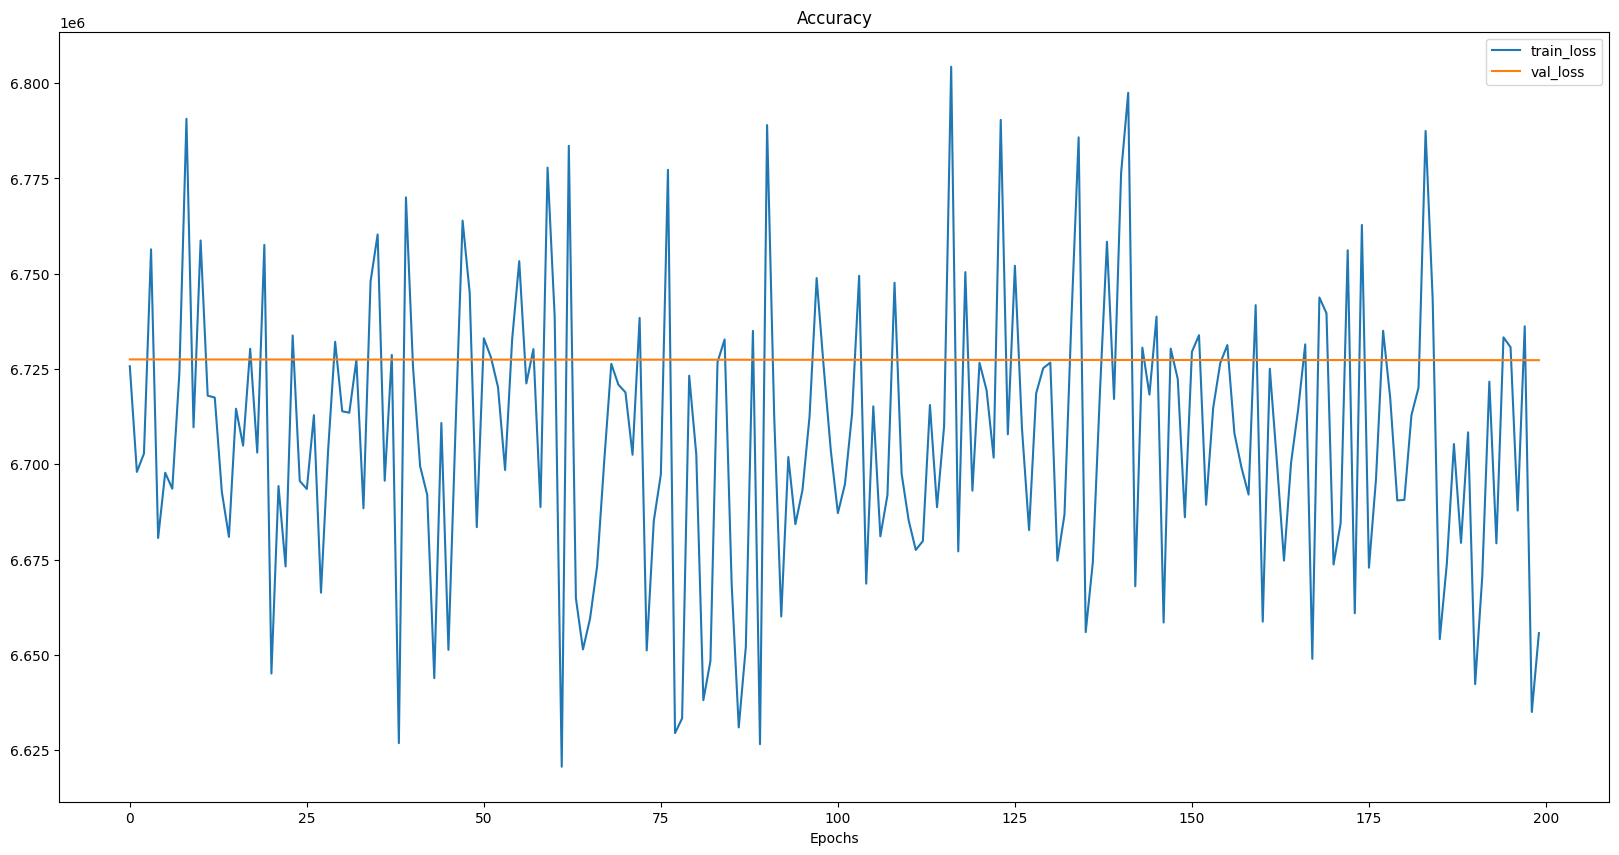

In [97]:
plot_loss_curves(history_2_3)

In [98]:
result_2_3 = model_2_3.evaluate(X_test, y_test)
result_2_3

173/173 [==============================] - 0s 3ms/step - loss: 6727324.0000 - rmse: 6738752.5000


[6727324.0, 6738752.5]

### Model 2.4: with Momentum (within SGD)

In [99]:
model_2_4 = tf.keras.Sequential([
    layers.Input(shape=(1048,)),
    layers.Dense(256, activation="relu"),
    layers.Dense(256, activation="relu"),
    layers.Dense(1)
])

model_2_4.compile(loss=rmse, optimizer=optimizers.SGD(momentum=0.3), metrics=[rmse])

In [100]:
history_2_4 = model_2_4.fit(X_train_tf, y_train_tf, epochs=200, validation_data=(X_test, y_test))

Epoch 1/200
403/403 [==============================] - 2s 4ms/step - loss: 6648530.5000 - rmse: 6649015.0000 - val_loss: 6727515.5000 - val_rmse: 6738943.5000
Epoch 2/200
403/403 [==============================] - 1s 3ms/step - loss: 6742471.0000 - rmse: 6742090.5000 - val_loss: 6727514.5000 - val_rmse: 6738942.5000
Epoch 3/200
403/403 [==============================] - 1s 3ms/step - loss: 6685897.5000 - rmse: 6688470.5000 - val_loss: 6727514.0000 - val_rmse: 6738942.0000
Epoch 4/200
403/403 [==============================] - 2s 4ms/step - loss: 6769699.5000 - rmse: 6769246.0000 - val_loss: 6727512.5000 - val_rmse: 6738940.5000
Epoch 5/200
403/403 [==============================] - 2s 4ms/step - loss: 6687862.5000 - rmse: 6687760.5000 - val_loss: 6727511.0000 - val_rmse: 6738939.0000
Epoch 6/200
403/403 [==============================] - 1s 4ms/step - loss: 6639595.5000 - rmse: 6640525.0000 - val_loss: 6727510.5000 - val_rmse: 6738938.0000
Epoch 7/200
403/403 [=========================

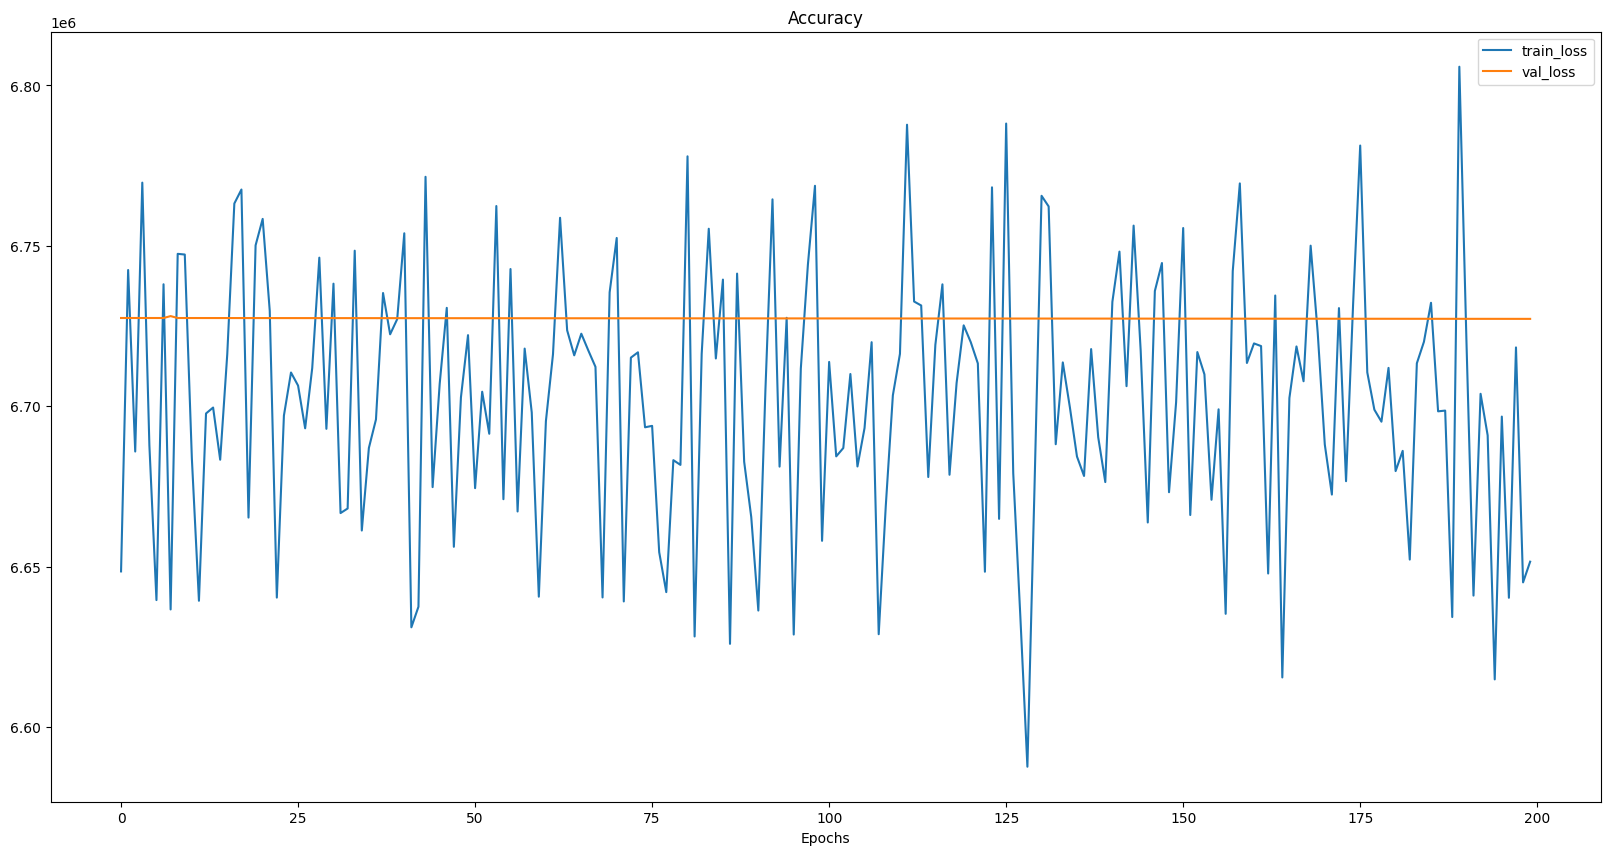

In [101]:
plot_loss_curves(history_2_4)

In [102]:
result_2_4 = model_2_4.evaluate(X_test, y_test)
result_2_4

173/173 [==============================] - 0s 2ms/step - loss: 6727241.0000 - rmse: 6738669.0000


[6727241.0, 6738669.0]

### Model 2.5: with RMSProp

The gist of RMSprop is to:
 - Maintain a moving (discounted) average of the square of gradients
 - Divide the gradient by the root of this average

This implementation of RMSprop uses plain momentum, not Nesterov momentum.

The centered version additionally maintains a moving average of the gradients, and uses that average to estimate the variance.

In [104]:
model_2_5 = tf.keras.Sequential([
    layers.Input(shape=(1048,)),
    layers.Dense(256, activation="relu"),
    layers.Dense(256, activation="relu"),
    layers.Dense(1)
])

model_2_5.compile(loss=rmse, optimizer=optimizers.RMSprop(), metrics=[rmse])

In [105]:
history_2_5 = model_2_5.fit(X_train_tf, y_train_tf, epochs=200, validation_data=(X_test, y_test))

Epoch 1/200
403/403 [==============================] - 3s 5ms/step - loss: 6723146.5000 - rmse: 6722640.5000 - val_loss: 6712845.0000 - val_rmse: 6724278.0000
Epoch 2/200
403/403 [==============================] - 2s 4ms/step - loss: 6640998.0000 - rmse: 6640724.0000 - val_loss: 6636605.0000 - val_rmse: 6648063.5000
Epoch 3/200
403/403 [==============================] - 1s 4ms/step - loss: 6504149.5000 - rmse: 6506492.0000 - val_loss: 6469842.0000 - val_rmse: 6481337.5000
Epoch 4/200
403/403 [==============================] - 2s 4ms/step - loss: 6262886.5000 - rmse: 6262053.5000 - val_loss: 6270925.5000 - val_rmse: 6282377.0000
Epoch 5/200
403/403 [==============================] - 2s 4ms/step - loss: 6179682.5000 - rmse: 6178989.0000 - val_loss: 6190249.5000 - val_rmse: 6201555.5000
Epoch 6/200
403/403 [==============================] - 2s 4ms/step - loss: 6173966.0000 - rmse: 6175319.5000 - val_loss: 6166032.0000 - val_rmse: 6177277.0000
Epoch 7/200
403/403 [=========================

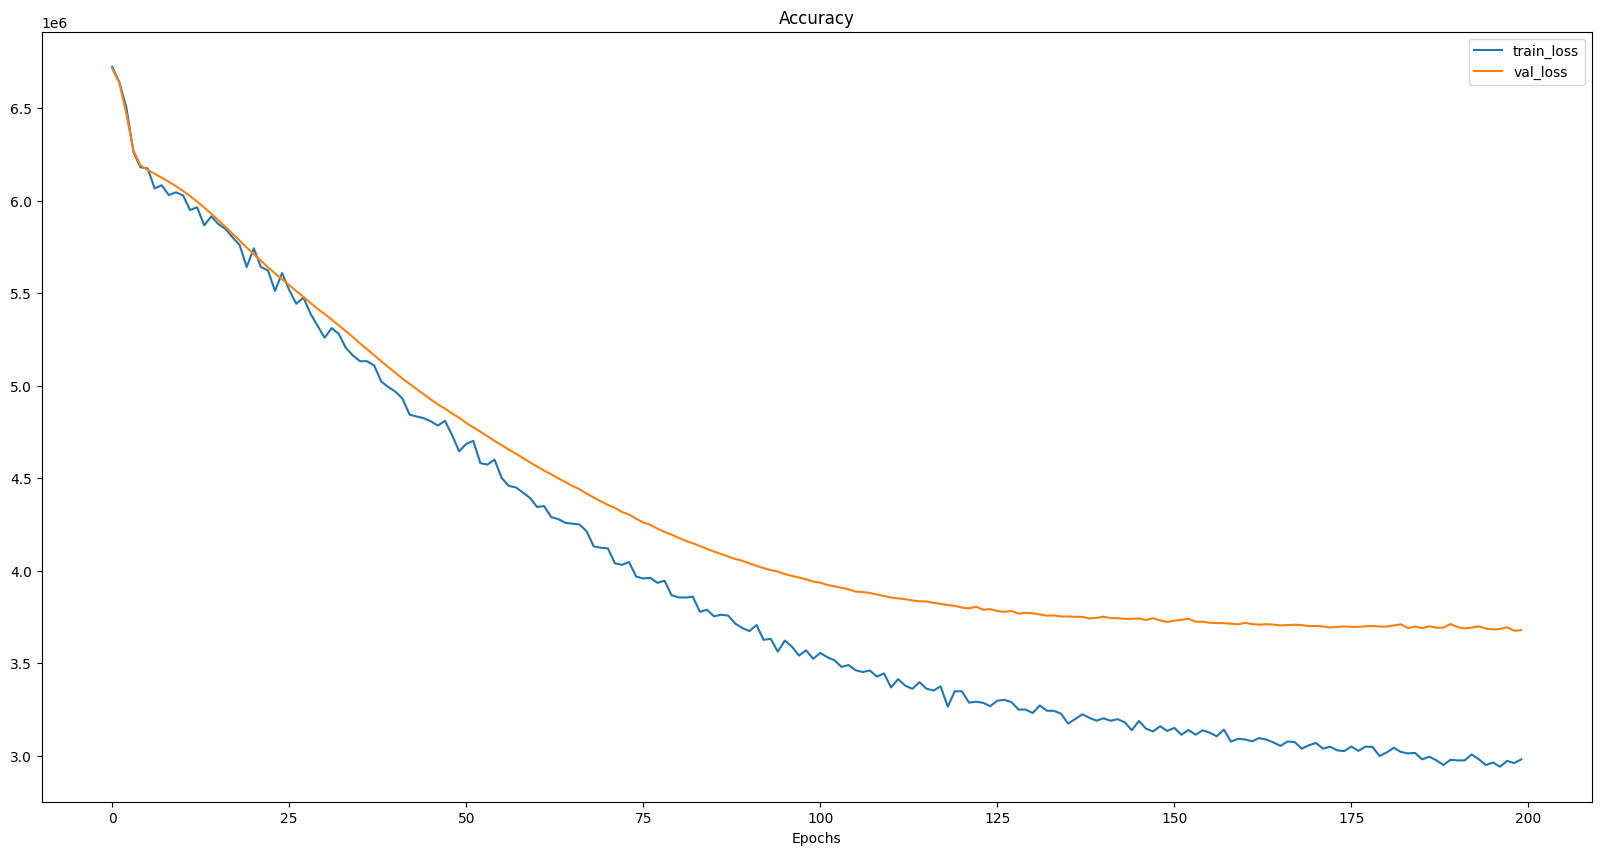

In [106]:
plot_loss_curves(history_2_5)

In [107]:
result_2_5 = model_2_5.evaluate(X_test, y_test)
result_2_5

173/173 [==============================] - 0s 2ms/step - loss: 3679116.7500 - rmse: 3684686.0000


[3679116.75, 3684686.0]

### Model 2.6: With Ftrl

"Follow The Regularized Leader" (FTRL) is an optimization algorithm developed at Google for click-through rate prediction in the early 2010s. It is most suitable for shallow models with large and sparse feature spaces. The algorithm is described by McMahan et al., 2013. The Keras version has support for both online L2 regularization (the L2 regularization described in the paper above) and shrinkage-type L2 regularization (which is the addition of an L2 penalty to the loss function).

In [108]:
model_2_6 = tf.keras.Sequential([
    layers.Input(shape=(1048,)),
    layers.Dense(256, activation="relu"),
    layers.Dense(256, activation="relu"),
    layers.Dense(1)
])

model_2_6.compile(loss=rmse, optimizer=optimizers.Ftrl(), metrics=[rmse])

In [109]:
history_2_6 = model_2_6.fit(X_train_tf, y_train_tf, epochs=200, validation_data=(X_test, y_test))

Epoch 1/200
403/403 [==============================] - 2s 5ms/step - loss: 6723785.0000 - rmse: 6724085.0000 - val_loss: 6727520.5000 - val_rmse: 6738948.5000
Epoch 2/200
403/403 [==============================] - 2s 4ms/step - loss: 6666948.0000 - rmse: 6666871.0000 - val_loss: 6727520.5000 - val_rmse: 6738948.5000
Epoch 3/200
403/403 [==============================] - 2s 4ms/step - loss: 6705297.5000 - rmse: 6705057.5000 - val_loss: 6727520.5000 - val_rmse: 6738948.5000
Epoch 4/200
403/403 [==============================] - 2s 4ms/step - loss: 6763617.5000 - rmse: 6764646.5000 - val_loss: 6727520.5000 - val_rmse: 6738948.5000
Epoch 5/200
403/403 [==============================] - 2s 4ms/step - loss: 6735908.0000 - rmse: 6735379.0000 - val_loss: 6727520.5000 - val_rmse: 6738948.5000
Epoch 6/200
403/403 [==============================] - 2s 4ms/step - loss: 6742126.0000 - rmse: 6741310.5000 - val_loss: 6727520.5000 - val_rmse: 6738948.5000
Epoch 7/200
403/403 [=========================

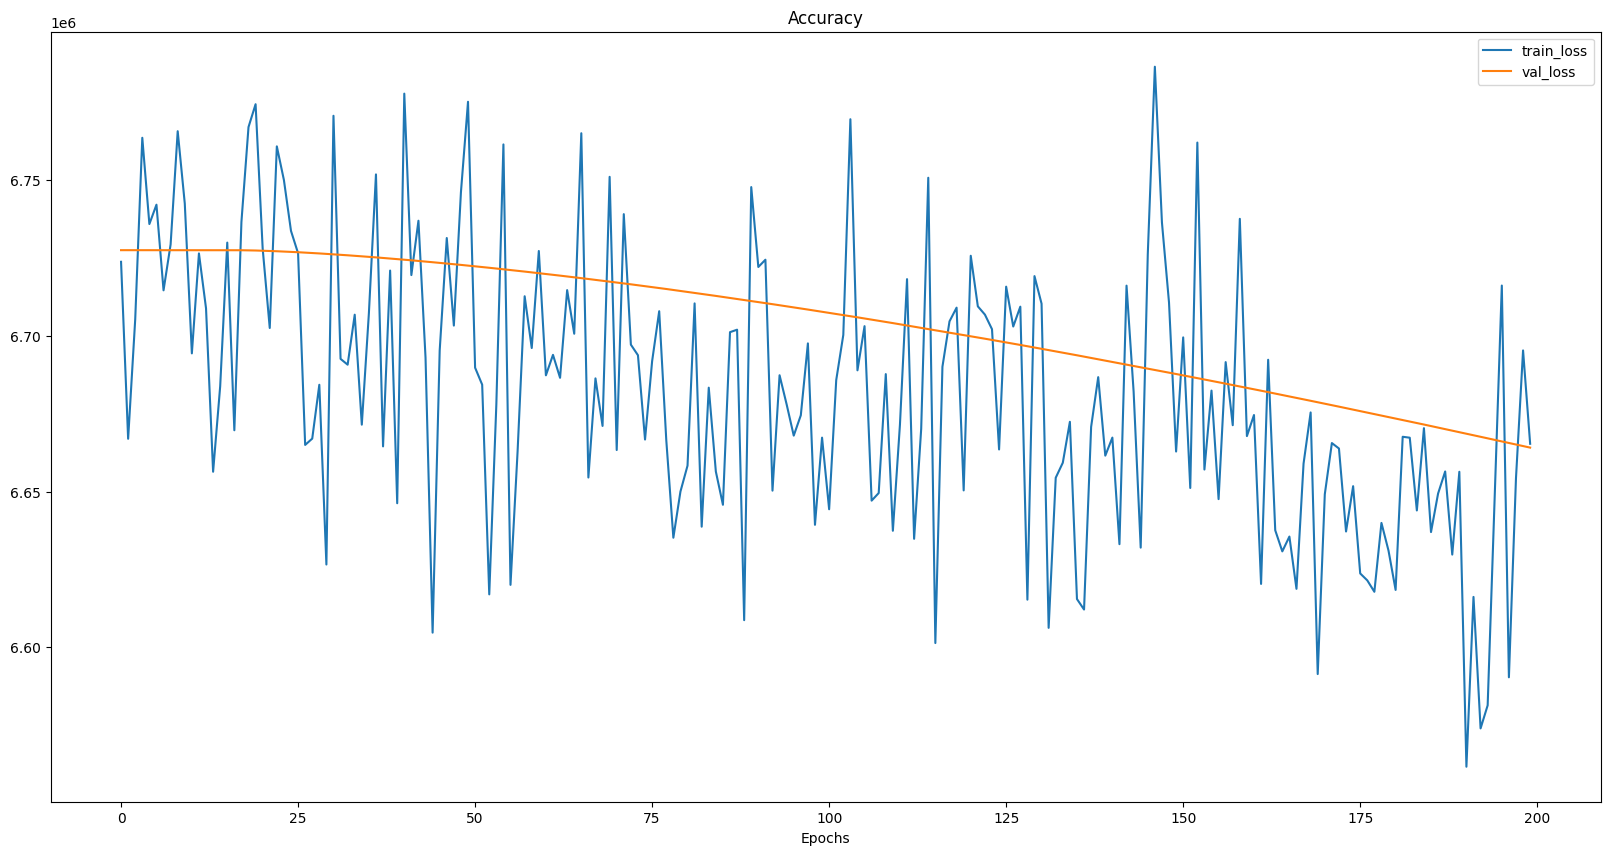

In [110]:
plot_loss_curves(history_2_6)

In [ ]:
result_2_6 = model_2_5.evaluate(X_test, y_test)
result_2_6

## Conclusion

In [134]:
pd.DataFrame(optimizer_result_dict, index=optimizer_result_dict.keys())

,Adagrad,Adadelta,SGD (nesterov),SGD (momentum = 0.37),RMSPRop,Ftrl
Adagrad,4144053.5,3694370.0,6727324.0,6727241.0,3679116.75,3679116.75
Adadelta,4144053.5,3694370.0,6727324.0,6727241.0,3679116.75,3679116.75
SGD (nesterov),4144053.5,3694370.0,6727324.0,6727241.0,3679116.75,3679116.75
SGD (momentum = 0.37),4144053.5,3694370.0,6727324.0,6727241.0,3679116.75,3679116.75
RMSPRop,4144053.5,3694370.0,6727324.0,6727241.0,3679116.75,3679116.75
Ftrl,4144053.5,3694370.0,6727324.0,6727241.0,3679116.75,3679116.75


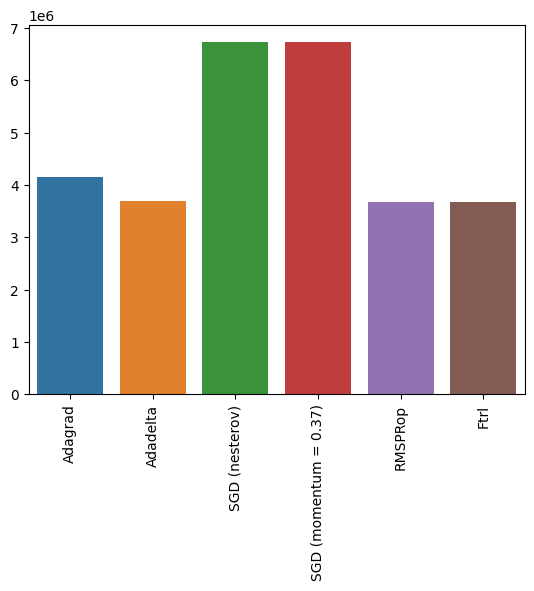

In [137]:
optimizer_result_dict = {
    "Adagrad": result_2_1[0],
    "Adadelta": result_2_2[0],
    "SGD (nesterov)": result_2_3[0],
    "SGD (momentum = 0.37)": result_2_4[0],
    "RMSPRop": result_2_5[0],
    "Ftrl": result_2_5[0]
}

sns.barplot(data=pd.DataFrame(optimizer_result_dict, index=optimizer_result_dict.keys()));
plt.xticks(rotation=90);

**Looks like Adadelta is giving best results for our problem.**

It also indicates that SGD is least effective optimizer that we can try on. Adadelta is also providing same result as ADAM.